In [1]:
# 🔌 Cargar la extensión de Kedro en Jupyter
%load_ext kedro.ipython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[09/15/25 20:56:39] INFO     Using                                                                  ]8;id=374581;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=198136;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\                
                             framework\project\rich_logging.yml' as logging configuration.                         

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=753423;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=384611;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=267711;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=910118;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=577797;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=650195;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\Kevin\Documents\GitHub\Ml_Bank\proyecto-ml-sebastiancarrera-k                
                             evinvivanco.                                                                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/15/25 20:56:42] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=621621;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=117128;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[09/15/25 20:56:43] INFO     Kedro project Proyecto_ML_SebastianCarrera_KevinVivanco                ]8;id=389552;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=367593;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=938089;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=330235;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[09/15/25 20:56:44] INFO     Registered line magic 'run_viz'                                        ]8;id=751115;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=813491;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [2]:

# Cargar datasets intermedios (ESTOS YA TIENEN VARIABLES QUE CONSIDERAMOS IRRELEVANTES " UNNAMED / VAR REDUNDATE)
df_cleaned = catalog.load("NIV_cleaned_dataset")
df_customer = catalog.load("NIV_customer_agg")
df_rfm = catalog.load("NIV_RFM")


print("Cleaned:", df_cleaned.shape)
print("Customer:", df_customer.shape)
print("RFM:", df_rfm.shape)

[09/15/25 19:56:10] INFO     Loading data from NIV_cleaned_dataset (CSVDataset)...             ]8;id=95098;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=484206;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/15/25 19:56:13] INFO     Loading data from NIV_customer_agg (CSVDataset)...                ]8;id=972589;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=576041;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/15/25 19:56:15] INFO     Loading data from NIV_RFM (CSVDataset)...                         ]8;id=886347;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=782373;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Cleaned: (984247, 6)
Customer: (838370, 11)
RFM: (838370, 6)


ELIMINAR NULOS DE DATASETS "CLEANED" Y "CUSTOMER"
Motivo: Cantidad menor al 1% (11 filas)

In [10]:
#Eliminar nulos porque son despreciales (7 o 10)
print("Shape antes de eliminar nulos:", df_cleaned.shape)
print("Nulos restantes por columna:\n", df_cleaned.isnull().sum())
df_cleaned = df_cleaned.dropna()
print("Shape después de eliminar nulos:", df_cleaned.shape)
print("Nulos restantes por columna:\n", df_cleaned.isnull().sum())


print("Shape antes de eliminar nulos:", df_customer.shape)
print("Nulos restantes por columna:\n", df_customer.isnull().sum())
df_customer = df_customer.dropna()
print("Shape después de eliminar nulos:", df_customer.shape)
print("Nulos restantes por columna:\n", df_customer.isnull().sum())



Shape antes de eliminar nulos: (984247, 6)
Nulos restantes por columna:
 TransactionID              0
CustomerID                 0
CustLocation               7
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64
Shape después de eliminar nulos: (984240, 6)
Nulos restantes por columna:
 TransactionID              0
CustomerID                 0
CustLocation               0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64
Shape antes de eliminar nulos: (838370, 11)
Nulos restantes por columna:
 CustomerID        0
txn_count         0
total_spent       0
avg_spent         0
max_spent         0
avg_balance       0
first_txn_date    0
last_txn_date     0
recency_days      0
tenure_days       0
txn_per_day       0
dtype: int64
Shape después de eliminar nulos: (838370, 11)
Nulos restantes por columna:
 CustomerID        0
txn_count         0
total_spent       0
avg_spent         0
max_spent      

## Transformación de variables a u formato correcto

### 1. df_cleaned

In [3]:
# 1. TransactionDate → datetime
df_cleaned["TransactionDate"] = pd.to_datetime(
    df_cleaned["TransactionDate"], errors="coerce"
)

# 2. TransactionTime → datetime (solo hora)
df_cleaned["TransactionTime"] = pd.to_datetime(
    df_cleaned["TransactionTime"], format="%H:%M:%S", errors="coerce"
).dt.time

# 3. CustLocation → categoría
df_cleaned["CustLocation"] = df_cleaned["CustLocation"].astype("category")

# 4. IDs → string explícito
df_cleaned["TransactionID"] = df_cleaned["TransactionID"].astype("string")
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype("string")

print("Transformaciones aplicadas a df_cleaned")
print(df_cleaned.info())
print(df_cleaned.head())
print("Nulos restantes por columna:\n", df_cleaned.isnull().sum())


Transformaciones aplicadas a df_cleaned
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984247 entries, 0 to 984246
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984247 non-null  string        
 1   CustomerID               984247 non-null  string        
 2   CustLocation             984240 non-null  category      
 3   TransactionDate          984247 non-null  datetime64[ns]
 4   TransactionTime          984247 non-null  object        
 5   TransactionAmount (INR)  984247 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(1), string(2)
memory usage: 39.6+ MB
None
  TransactionID CustomerID CustLocation TransactionDate TransactionTime  \
0            T1   C5841053   JAMSHEDPUR      2016-08-02        14:32:07   
1            T2   C2142763      JHAJJAR      2016-08-02        14:18:58   
2            T3   C4417068  

### 2. df_customer

In [5]:
# CustomerID → string
df_customer["CustomerID"] = df_customer["CustomerID"].astype("string")

# Fechas → datetime
df_customer["first_txn_date"] = pd.to_datetime(df_customer["first_txn_date"], errors="coerce")
df_customer["last_txn_date"]  = pd.to_datetime(df_customer["last_txn_date"], errors="coerce")

print("Transformaciones aplicadas")
print(df_customer.info())
print(df_customer.head())
print("Nulos restantes por columna:\n", df_customer.isnull().sum())


Transformaciones aplicadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838370 entries, 0 to 838369
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CustomerID      838370 non-null  string        
 1   txn_count       838370 non-null  int64         
 2   total_spent     838370 non-null  float64       
 3   avg_spent       838370 non-null  float64       
 4   max_spent       838370 non-null  float64       
 5   avg_balance     838370 non-null  float64       
 6   first_txn_date  838370 non-null  datetime64[ns]
 7   last_txn_date   838370 non-null  datetime64[ns]
 8   recency_days    838370 non-null  int64         
 9   tenure_days     838370 non-null  int64         
 10  txn_per_day     838370 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), string(1)
memory usage: 70.4 MB
None
  CustomerID  txn_count  total_spent  avg_spent  max_spent  avg_balance  \
0   C1010011

## 3. df_rfm

In [4]:
# CustomerID → string
df_rfm["CustomerID"] = df_rfm["CustomerID"].astype("string")

# Segment_Final → category
df_rfm["Segment_Final"] = df_rfm["Segment_Final"].astype("category")

print("Transformaciones aplicadas")
print(df_customer.info())
print(df_customer.head())
print("Nulos restantes por columna:\n", df_rfm.isnull().sum())


Transformaciones aplicadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838370 entries, 0 to 838369
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CustomerID      838370 non-null  object 
 1   txn_count       838370 non-null  int64  
 2   total_spent     838370 non-null  float64
 3   avg_spent       838370 non-null  float64
 4   max_spent       838370 non-null  float64
 5   avg_balance     838370 non-null  float64
 6   first_txn_date  838370 non-null  object 
 7   last_txn_date   838370 non-null  object 
 8   recency_days    838370 non-null  int64  
 9   tenure_days     838370 non-null  int64  
 10  txn_per_day     838370 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 70.4+ MB
None
  CustomerID  txn_count  total_spent  avg_spent  max_spent  avg_balance  \
0   C1010011          2       5106.0     2553.0     4750.0    76340.635   
1   C1010012          1       1499.0     1499.

In [6]:
#Guardar los df
catalog.save("PRI_cleaned", df_cleaned)
catalog.save("PRI_customer", df_customer)
catalog.save("PRI_rfm", df_rfm)


[09/15/25 19:57:00] INFO     Saving data to PRI_cleaned (CSVDataset)...                        ]8;id=900606;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=431229;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

[09/15/25 19:57:05] INFO     Saving data to PRI_customer (CSVDataset)...                       ]8;id=714971;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=104926;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

[09/15/25 19:57:16] INFO     Saving data to PRI_rfm (CSVDataset)...                            ]8;id=323376;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=747801;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

Shape de PRI_full: (984240, 21)
Primeras filas:


,TransactionID,CustomerID,CustLocation,TransactionDate,TransactionTime,TransactionAmount (INR),txn_count,total_spent,avg_spent,max_spent,...,first_txn_date,last_txn_date,recency_days,tenure_days,txn_per_day,Recency,Frequency,Monetary,RFM Score,Segment_Final
0,T1,C5841053,JAMSHEDPUR,2016-08-02,14:32:07,25.0,1,25.0,25.0,25.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,25.0,131,At Risk/ Lost
1,T2,C2142763,JHAJJAR,2016-08-02,14:18:58,27999.0,1,27999.0,27999.0,27999.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,27999.0,115,At Risk/ Lost
2,T3,C4417068,MUMBAI,2016-08-02,14:27:12,459.0,1,459.0,459.0,459.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,459.0,123,At Risk/ Lost
3,T4,C5342380,MUMBAI,2016-08-02,14:27:14,2060.0,2,2938.4,1469.2,2060.0,...,2016-08-02,2016-08-13,69,11,0.181818,69,2,2938.4,255,Critical
4,T5,C9031234,NAVI MUMBAI,2016-08-02,18:11:56,1762.5,1,1762.5,1762.5,1762.5,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,1762.5,154,Critical


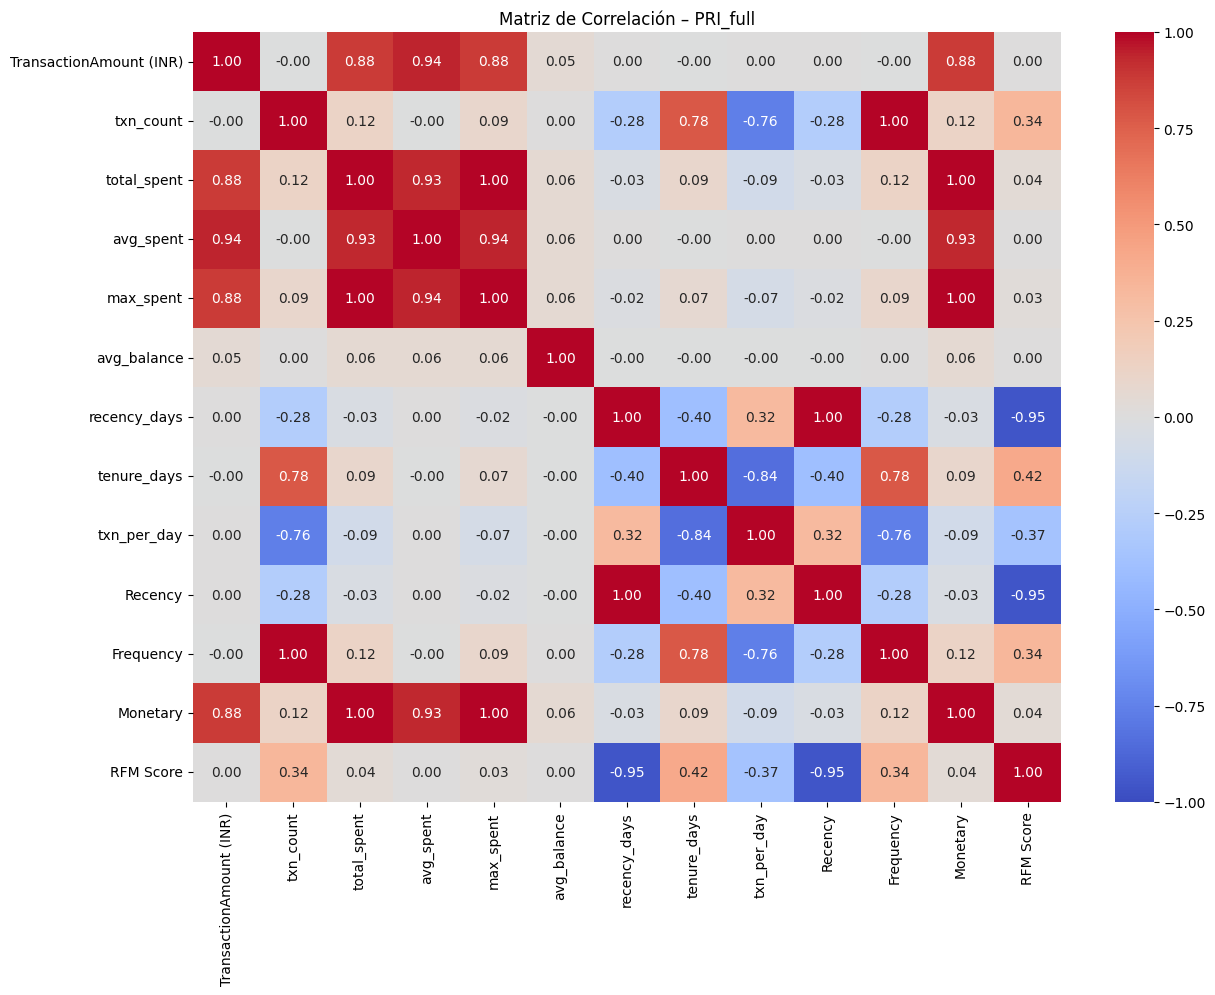

In [6]:
df_full = pd.read_csv("../data/03_primary/PRI_full.csv", encoding="latin1")



print("Shape de PRI_full:", df_full.shape)
print("Primeras filas:")
display(df_full.head())

# 2. Seleccionar solo variables numéricas
num_cols = df_full.select_dtypes(include=["int64","float64"]).columns

# 3. Calcular matriz de correlación
corr = df_full[num_cols].corr()

# 4. Graficar heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación – PRI_full")
plt.show()